In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

In [2]:
baseball = pd.read_csv('C:/Users/abern/OneDrive/CIND820/baseball.csv')
baseball.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [3]:
#Add Run Differential (RD) variable
new_col = baseball['RS'] - baseball['RA']
baseball.insert(6, 'RD', new_col)

In [4]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          1232 non-null   object 
 1   League        1232 non-null   object 
 2   Year          1232 non-null   int64  
 3   RS            1232 non-null   int64  
 4   RA            1232 non-null   int64  
 5   W             1232 non-null   int64  
 6   RD            1232 non-null   int64  
 7   OBP           1232 non-null   float64
 8   SLG           1232 non-null   float64
 9   BA            1232 non-null   float64
 10  Playoffs      1232 non-null   int64  
 11  RankSeason    244 non-null    float64
 12  RankPlayoffs  244 non-null    float64
 13  G             1232 non-null   int64  
 14  OOBP          420 non-null    float64
 15  OSLG          420 non-null    float64
dtypes: float64(7), int64(7), object(2)
memory usage: 154.1+ KB


In [5]:
#Check for Categorical variables

baseball.describe(include = 'O')

,Team,League
count,1232,1232
unique,39,2
top,CHC,AL
freq,47,616


In [6]:
#Convert 'Team' variable to a numeric variable

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X_en = baseball.iloc[:,0].values

In [7]:
X_en =labelencoder.fit_transform(X_en)
X_en

array([ 1,  2,  3, ..., 31, 32, 37])

In [8]:
X = baseball
X['Team'] = X_en
y = baseball.iloc[:,0].values

In [9]:
baseball_1 = X.copy()
baseball_1['Team'] = y
baseball_1

,Team,League,Year,RS,RA,W,RD,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,NL,2012,734,688,81,46,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,2,NL,2012,700,600,94,100,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,3,AL,2012,712,705,93,7,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,4,AL,2012,734,806,69,-72,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,6,NL,2012,613,759,61,-146,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,26,NL,1962,705,759,81,-54,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN
1228,27,NL,1962,706,626,93,80,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN
1229,31,NL,1962,878,690,103,188,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,32,NL,1962,774,664,84,110,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN


In [10]:
#Convert 'League' variable into a numeric variable

X_e = baseball_1.iloc[:,1].values

In [11]:
X_e = labelencoder.fit_transform(X_e)
X_e

array([1, 1, 0, ..., 1, 1, 0])

In [12]:
Y = baseball_1
Y['League'] = X_e

In [13]:
baseball_2 = Y.copy()
baseball_2

,Team,League,Year,RS,RA,W,RD,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,1,2012,734,688,81,46,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,2,1,2012,700,600,94,100,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,3,0,2012,712,705,93,7,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,4,0,2012,734,806,69,-72,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,6,1,2012,613,759,61,-146,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,26,1,1962,705,759,81,-54,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN
1228,27,1,1962,706,626,93,80,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN
1229,31,1,1962,878,690,103,188,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,32,1,1962,774,664,84,110,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN


In [14]:
baseball_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          1232 non-null   int32  
 1   League        1232 non-null   int32  
 2   Year          1232 non-null   int64  
 3   RS            1232 non-null   int64  
 4   RA            1232 non-null   int64  
 5   W             1232 non-null   int64  
 6   RD            1232 non-null   int64  
 7   OBP           1232 non-null   float64
 8   SLG           1232 non-null   float64
 9   BA            1232 non-null   float64
 10  Playoffs      1232 non-null   int64  
 11  RankSeason    244 non-null    float64
 12  RankPlayoffs  244 non-null    float64
 13  G             1232 non-null   int64  
 14  OOBP          420 non-null    float64
 15  OSLG          420 non-null    float64
dtypes: float64(7), int32(2), int64(7)
memory usage: 144.5 KB


In [15]:
#Replace NA's in 'RankSeason' and 'RankPlayoffs' with 0.

baseball_2[['RankSeason', 'RankPlayoffs']] = baseball_2[['RankSeason', 'RankPlayoffs']].fillna(0)
baseball_2

,Team,League,Year,RS,RA,W,RD,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,1,2012,734,688,81,46,0.328,0.418,0.259,0,0.0,0.0,162,0.317,0.415
1,2,1,2012,700,600,94,100,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,3,0,2012,712,705,93,7,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,4,0,2012,734,806,69,-72,0.315,0.415,0.260,0,0.0,0.0,162,0.331,0.428
4,6,1,2012,613,759,61,-146,0.302,0.378,0.240,0,0.0,0.0,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,26,1,1962,705,759,81,-54,0.330,0.390,0.260,0,0.0,0.0,161,NaN,NaN
1228,27,1,1962,706,626,93,80,0.321,0.394,0.268,0,0.0,0.0,161,NaN,NaN
1229,31,1,1962,878,690,103,188,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,32,1,1962,774,664,84,110,0.335,0.394,0.271,0,0.0,0.0,163,NaN,NaN


In [16]:
#Predict for NAs in 'OOBP'

data_without_null = baseball_2.dropna()
data_without_null

,Team,League,Year,RS,RA,W,RD,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,1,2012,734,688,81,46,0.328,0.418,0.259,0,0.0,0.0,162,0.317,0.415
1,2,1,2012,700,600,94,100,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,3,0,2012,712,705,93,7,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,4,0,2012,734,806,69,-72,0.315,0.415,0.260,0,0.0,0.0,162,0.331,0.428
4,6,1,2012,613,759,61,-146,0.302,0.378,0.240,0,0.0,0.0,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,31,1,1999,872,831,86,41,0.356,0.434,0.271,0,0.0,0.0,162,0.345,0.423
416,32,1,1999,809,838,75,-29,0.338,0.426,0.262,0,0.0,0.0,161,0.355,0.427
417,33,0,1999,772,913,69,-141,0.343,0.411,0.274,0,0.0,0.0,162,0.371,0.448
418,35,0,1999,945,859,95,86,0.361,0.479,0.293,1,5.0,4.0,162,0.346,0.459


In [17]:
train_data_x = data_without_null.iloc[:,:13]
train_data_y = data_without_null.iloc[:,13]

In [18]:
train_data_x

,Team,League,Year,RS,RA,W,RD,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs
0,1,1,2012,734,688,81,46,0.328,0.418,0.259,0,0.0,0.0
1,2,1,2012,700,600,94,100,0.320,0.389,0.247,1,4.0,5.0
2,3,0,2012,712,705,93,7,0.311,0.417,0.247,1,5.0,4.0
3,4,0,2012,734,806,69,-72,0.315,0.415,0.260,0,0.0,0.0
4,6,1,2012,613,759,61,-146,0.302,0.378,0.240,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,31,1,1999,872,831,86,41,0.356,0.434,0.271,0,0.0,0.0
416,32,1,1999,809,838,75,-29,0.338,0.426,0.262,0,0.0,0.0
417,33,0,1999,772,913,69,-141,0.343,0.411,0.274,0,0.0,0.0
418,35,0,1999,945,859,95,86,0.361,0.479,0.293,1,5.0,4.0


In [19]:
train_data_y

0      162
1      162
2      162
3      162
4      162
      ... 
415    162
416    161
417    162
418    162
419    162
Name: G, Length: 420, dtype: int64

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_data_x, train_data_y)

LinearRegression()

In [21]:
test_data = baseball_2.iloc[:,:13]
test_data['OOBP'] = pd.DataFrame(lr.predict(test_data))
baseball_2.OOBP.fillna(test_data.OOBP, inplace = True)
baseball_2

,Team,League,Year,RS,RA,W,RD,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,1,2012,734,688,81,46,0.328,0.418,0.259,0,0.0,0.0,162,0.317000,0.415
1,2,1,2012,700,600,94,100,0.320,0.389,0.247,1,4.0,5.0,162,0.306000,0.378
2,3,0,2012,712,705,93,7,0.311,0.417,0.247,1,5.0,4.0,162,0.315000,0.403
3,4,0,2012,734,806,69,-72,0.315,0.415,0.260,0,0.0,0.0,162,0.331000,0.428
4,6,1,2012,613,759,61,-146,0.302,0.378,0.240,0,0.0,0.0,162,0.335000,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,26,1,1962,705,759,81,-54,0.330,0.390,0.260,0,0.0,0.0,161,161.257267,NaN
1228,27,1,1962,706,626,93,80,0.321,0.394,0.268,0,0.0,0.0,161,161.332126,NaN
1229,31,1,1962,878,690,103,188,0.341,0.441,0.278,1,1.0,2.0,165,161.370727,NaN
1230,32,1,1962,774,664,84,110,0.335,0.394,0.271,0,0.0,0.0,163,161.309236,NaN


In [22]:
#Round 'OOBP' to 3 decimal places

baseball_2['OOBP'] = baseball_2['OOBP'].round(decimals = 3)
baseball_2

,Team,League,Year,RS,RA,W,RD,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,1,2012,734,688,81,46,0.328,0.418,0.259,0,0.0,0.0,162,0.317,0.415
1,2,1,2012,700,600,94,100,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,3,0,2012,712,705,93,7,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,4,0,2012,734,806,69,-72,0.315,0.415,0.260,0,0.0,0.0,162,0.331,0.428
4,6,1,2012,613,759,61,-146,0.302,0.378,0.240,0,0.0,0.0,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,26,1,1962,705,759,81,-54,0.330,0.390,0.260,0,0.0,0.0,161,161.257,NaN
1228,27,1,1962,706,626,93,80,0.321,0.394,0.268,0,0.0,0.0,161,161.332,NaN
1229,31,1,1962,878,690,103,188,0.341,0.441,0.278,1,1.0,2.0,165,161.371,NaN
1230,32,1,1962,774,664,84,110,0.335,0.394,0.271,0,0.0,0.0,163,161.309,NaN


In [23]:
#Predict NA's for 'OSLG'

data2_without_null = baseball_2.dropna()
data2_without_null

,Team,League,Year,RS,RA,W,RD,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,1,2012,734,688,81,46,0.328,0.418,0.259,0,0.0,0.0,162,0.317,0.415
1,2,1,2012,700,600,94,100,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,3,0,2012,712,705,93,7,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,4,0,2012,734,806,69,-72,0.315,0.415,0.260,0,0.0,0.0,162,0.331,0.428
4,6,1,2012,613,759,61,-146,0.302,0.378,0.240,0,0.0,0.0,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,31,1,1999,872,831,86,41,0.356,0.434,0.271,0,0.0,0.0,162,0.345,0.423
416,32,1,1999,809,838,75,-29,0.338,0.426,0.262,0,0.0,0.0,161,0.355,0.427
417,33,0,1999,772,913,69,-141,0.343,0.411,0.274,0,0.0,0.0,162,0.371,0.448
418,35,0,1999,945,859,95,86,0.361,0.479,0.293,1,5.0,4.0,162,0.346,0.459


In [24]:
train2_data_x = data2_without_null.iloc[:,:14]
train2_data_y = data2_without_null.iloc[:,14]

In [25]:
train2_data_x

,Team,League,Year,RS,RA,W,RD,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G
0,1,1,2012,734,688,81,46,0.328,0.418,0.259,0,0.0,0.0,162
1,2,1,2012,700,600,94,100,0.320,0.389,0.247,1,4.0,5.0,162
2,3,0,2012,712,705,93,7,0.311,0.417,0.247,1,5.0,4.0,162
3,4,0,2012,734,806,69,-72,0.315,0.415,0.260,0,0.0,0.0,162
4,6,1,2012,613,759,61,-146,0.302,0.378,0.240,0,0.0,0.0,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,31,1,1999,872,831,86,41,0.356,0.434,0.271,0,0.0,0.0,162
416,32,1,1999,809,838,75,-29,0.338,0.426,0.262,0,0.0,0.0,161
417,33,0,1999,772,913,69,-141,0.343,0.411,0.274,0,0.0,0.0,162
418,35,0,1999,945,859,95,86,0.361,0.479,0.293,1,5.0,4.0,162


In [26]:
train2_data_y

0      0.317
1      0.306
2      0.315
3      0.331
4      0.335
       ...  
415    0.345
416    0.355
417    0.371
418    0.346
419    0.353
Name: OOBP, Length: 420, dtype: float64

In [27]:
lr.fit(train2_data_x, train2_data_y)

LinearRegression()

In [28]:
test2_data = baseball_2.iloc[:,:14]
test2_data['OSLG'] = pd.DataFrame(lr.predict(test2_data))
baseball_2.OSLG.fillna(test2_data.OSLG, inplace = True)
baseball_2

,Team,League,Year,RS,RA,W,RD,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,1,2012,734,688,81,46,0.328,0.418,0.259,0,0.0,0.0,162,0.317,0.415000
1,2,1,2012,700,600,94,100,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378000
2,3,0,2012,712,705,93,7,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403000
3,4,0,2012,734,806,69,-72,0.315,0.415,0.260,0,0.0,0.0,162,0.331,0.428000
4,6,1,2012,613,759,61,-146,0.302,0.378,0.240,0,0.0,0.0,162,0.335,0.424000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,26,1,1962,705,759,81,-54,0.330,0.390,0.260,0,0.0,0.0,161,161.257,0.340993
1228,27,1,1962,706,626,93,80,0.321,0.394,0.268,0,0.0,0.0,161,161.332,0.320679
1229,31,1,1962,878,690,103,188,0.341,0.441,0.278,1,1.0,2.0,165,161.371,0.324978
1230,32,1,1962,774,664,84,110,0.335,0.394,0.271,0,0.0,0.0,163,161.309,0.327632


In [29]:
#Round 'OSLG' to 3 decimals

baseball_2['OSLG'] = baseball_2['OSLG'].round(decimals = 3)
baseball_2

,Team,League,Year,RS,RA,W,RD,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,1,2012,734,688,81,46,0.328,0.418,0.259,0,0.0,0.0,162,0.317,0.415
1,2,1,2012,700,600,94,100,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,3,0,2012,712,705,93,7,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,4,0,2012,734,806,69,-72,0.315,0.415,0.260,0,0.0,0.0,162,0.331,0.428
4,6,1,2012,613,759,61,-146,0.302,0.378,0.240,0,0.0,0.0,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,26,1,1962,705,759,81,-54,0.330,0.390,0.260,0,0.0,0.0,161,161.257,0.341
1228,27,1,1962,706,626,93,80,0.321,0.394,0.268,0,0.0,0.0,161,161.332,0.321
1229,31,1,1962,878,690,103,188,0.341,0.441,0.278,1,1.0,2.0,165,161.371,0.325
1230,32,1,1962,774,664,84,110,0.335,0.394,0.271,0,0.0,0.0,163,161.309,0.328


In [30]:
## Rank the variables by importance with ANOVA
import time
start = time.time()
importances = baseball_2.drop('Playoffs', axis = 1).apply(lambda x: x.corr(baseball_2.Playoffs))
indices = np.argsort(importances)
print(importances[indices])

RA             -2.614768e-01
OOBP           -1.322234e-01
OSLG           -8.526631e-03
Team           -3.757032e-03
League         -2.261189e-19
G               2.220776e-02
Year            1.457787e-01
BA              2.902170e-01
SLG             3.247127e-01
OBP             3.638902e-01
RS              3.866285e-01
RD              5.810944e-01
W               6.167573e-01
RankSeason      8.497857e-01
RankPlayoffs    9.122019e-01
dtype: float64


In [31]:
end = time.time()
elapsed_time = end - start
print('Elapsed time:', elapsed_time, 'seconds')

Elapsed time: 0.03390932083129883 seconds


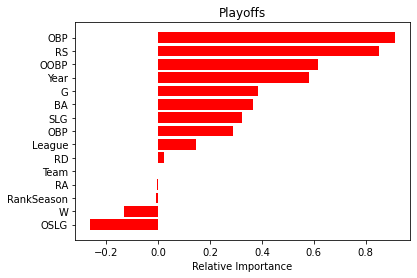

In [32]:
names = ['RA', 'Team', 'League', 'G', 'OSLG', 'OOBP', 'Year', 'BA', 'SLG', 'OBP', 'RS', 'OBP', 'RD', 'W', 'RankSeason', 'RankPlayoffs']
plt.title('Playoffs')
plt.barh(range(len(indices)), importances[indices], color = 'r', align = 'center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [33]:
#Set importance threshold to 0.4 and show the variables greater than 0.4

for i in range(0, len(indices)):
    if np.abs(importances[i]) > 0.4:
        print(names[i])

OOBP
Year
RS
OBP


In [34]:
#Drop unimportant variables (Year, Team, League, RankSeason, RankPlayoffs, G)

baseball_3 = baseball_2.drop(['Year', 'Team', 'League', 'RankSeason', 'RankPlayoffs', 'G'], axis = 1)

In [35]:
## Rank the variables by importance with ANOVA
start1 = time.time()
importances1 = baseball_3.drop('Playoffs', axis = 1).apply(lambda x: x.corr(baseball_3.Playoffs))
indices1 = np.argsort(importances1)
print(importances1[indices1])

RA     -0.261477
OOBP   -0.132223
OSLG   -0.008527
BA      0.290217
SLG     0.324713
OBP     0.363890
RS      0.386628
RD      0.581094
W       0.616757
dtype: float64


In [36]:
end1 = time.time()
elapsed_time1 = end1 - start1
print('Elapsed time:', elapsed_time1, 'seconds')

Elapsed time: 3.909811496734619 seconds


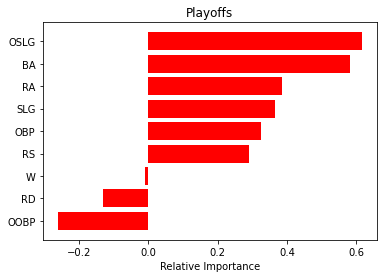

In [39]:
names1 = ['RA', 'OOBP', 'OSLG', 'BA', 'SLG', 'OBP', 'RS', 'RD', 'W']
plt.title('Playoffs')
plt.barh(range(len(indices1)), importances1[indices1], color = 'r', align = 'center')
plt.yticks(range(len(indices1)), [names1[i] for i in indices1])
plt.xlabel('Relative Importance')
plt.show()

In [40]:
#Set importance threshold to 0.4 and show the variables greater than 0.4

for i in range(0, len(indices1)):
    if np.abs(importances1[i]) > 0.3:
        print(names1[i])

RA
OSLG
BA
SLG
OBP
